# Question : 평일과 주말에 따른 방문 패턴의 차이는 무엇인가?

### Import

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings('ignore')

### Load

In [3]:
file_path = './data'

df = pd.read_csv(file_path + '/billiards_processing.csv')
df.head()

,닉네임,핸디,에버리지,날짜,종일,주간,야간,심야
0,도치,32,0.936,2023-04-01,0,1,0,0
1,큐사리,30,0.865,2023-04-01,0,1,0,0
2,레쓰비,30,0.797,2023-04-01,1,0,0,0
3,이장님,30,0.778,2023-04-01,0,1,0,0
4,서병관,30,0.723,2023-04-01,0,0,0,0


### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   닉네임     4641 non-null   object 
 1   핸디      4641 non-null   int64  
 2   에버리지    4641 non-null   float64
 3   날짜      4641 non-null   object 
 4   종일      4641 non-null   int64  
 5   주간      4641 non-null   int64  
 6   야간      4641 non-null   int64  
 7   심야      4641 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 290.2+ KB


In [5]:
# '날짜'를 날짜 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 요일 정보 추가 (0: 월요일 ~ 6: 일요일)
df['요일'] = df['날짜'].dt.dayofweek

# 평일(0-4)과 주말(5-6) 구분
df['평일_주말'] = df['요일'].apply(lambda x: '평일' if x < 5 else '주말')

In [6]:
# 각 시간대별로 방문 수를 구분 (하나라도 방문한 경우 방문자로 간주)
df['야간_심야'] = ((df['야간'] + df['심야']) > 0).astype(int)
df['종일_주간'] = ((df['종일'] + df['주간']) > 0).astype(int)

In [7]:
# 평일과 주말에 따른 시간대별 방문 수 집계
grouped = df.groupby('평일_주말')[['야간_심야', '종일_주간']].sum().reset_index()
grouped

,평일_주말,야간_심야,종일_주간
0,주말,329,654
1,평일,1392,889


### 시각화

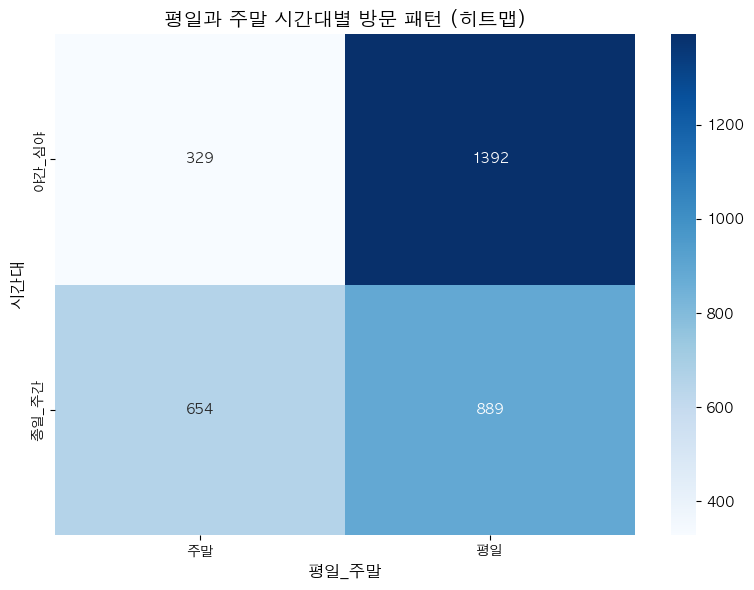

In [8]:
heatmap_data = grouped[['야간_심야', '종일_주간']].T
heatmap_data.columns = grouped['평일_주말']

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', cbar=True, fmt='d')

plt.title('평일과 주말 시간대별 방문 패턴 (히트맵)', fontsize=14)
plt.xlabel('평일_주말', fontsize=12)
plt.ylabel('시간대', fontsize=12)

plt.tight_layout()
plt.show()

### 통계적 검정
- 귀무가설(H₀): 평일과 주말의 야간 및 심야 시간대 방문 수 평균에 유의미한 차이가 없다.
- 대립가설(H₁): 평일과 주말의 야간 및 심야 시간대 방문 수 평균에 유의미한 차이가 있다.

In [10]:
# 가설1: 평일과 주말의 야간 및 심야 시간대 방문자 수 차이 검정

# 1. 평일과 주말의 '야간_심야' 데이터 분리
평일_야간_심야 = df[df['평일_주말'] == '평일']['야간_심야']
주말_야간_심야 = df[df['평일_주말'] == '주말']['야간_심야']

# 2. T-검정 수행
t_stat_야간_심야, p_value_야간_심야 = stats.ttest_ind(평일_야간_심야, 주말_야간_심야)

# 3. 결과 출력
print(f"야간+심야 T-검정 결과: t-statistic = {t_stat_야간_심야}, p-value = {p_value_야간_심야}")

# 4. 유의수준 0.05로 유의미한 차이가 있는지 확인
if p_value_야간_심야 < 0.05:
    print("평일과 주말 야간+심야 방문자 수에 유의미한 차이가 있습니다.")
else:
    print("평일과 주말 야간+심야 방문자 수에 유의미한 차이가 없습니다.")

야간+심야 T-검정 결과: t-statistic = 11.08749619976312, p-value = 3.253895200960797e-28
평일과 주말 야간+심야 방문자 수에 유의미한 차이가 있습니다.


### 통계적 검정
- 귀무가설(H₀): 평일과 주말의 종일 및 주간 시간대 방문 수 평균에 유의미한 차이가 없다.
- 대립가설(H₁): 평일과 주말의 종일 및 주간 시간대 방문 수 평균에 유의미한 차이가 있다.

In [11]:
# 가설2: 평일과 주말의 종일 및 주간 시간대 방문자 수 차이 검정

# 1. 평일과 주말의 '종일_주간' 데이터 분리
평일_종일_주간 = df[df['평일_주말'] == '평일']['종일_주간']
주말_종일_주간 = df[df['평일_주말'] == '주말']['종일_주간']

# 2. T-검정 수행
t_stat_종일_주간, p_value_종일_주간 = stats.ttest_ind(평일_종일_주간, 주말_종일_주간)

# 3. 결과 출력
print(f"종일+주간 T-검정 결과: t-statistic = {t_stat_종일_주간}, p-value = {p_value_종일_주간}")

# 4. 유의수준 0.05로 유의미한 차이가 있는지 확인
if p_value_종일_주간 < 0.05:
    print("평일과 주말 종일+주간 방문자 수에 유의미한 차이가 있습니다.")
else:
    print("평일과 주말 종일+주간 방문자 수에 유의미한 차이가 없습니다.")


종일+주간 T-검정 결과: t-statistic = -15.052635457160793, p-value = 4.954168875098667e-50
평일과 주말 종일+주간 방문자 수에 유의미한 차이가 있습니다.
